# CRISP-DM process using Airbnb Seattle Dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

i have three data files

In [36]:
df_listings=pd.read_csv('listings.csv')
df_calendar=pd.read_csv('calendar.csv')
df_reviews=pd.read_csv('reviews.csv')

Questions:

1)How long is the period available for lending by rooms?

2)Is there a busy season?

3)Are there any trends of popular rooms?

 *Data Understanding*

---

Calendar data 1st five rows and columns

In [37]:
df_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [38]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


If the available values are f, the price values seems to be NaN. But it is only a hypothesis

In [39]:
df_q1_calendar=df_calendar.groupby('available')['price'].count().reset_index()
df_q1_calendar.columns=['available','price_nonull']
df_q1_calendar

available  price_nonull
0         f             0
1         t        934542

How many rows per each listing_id? ie 365 days a year

In [40]:
df_q2_calendar=df_calendar.groupby('listing_id')['date'].count().reset_index()
df_q2_calendar['date'].value_counts()

365    3818
Name: date, dtype: int64

In [41]:
df_q3_calendar=df_calendar.copy(deep=True)
df_q3_calendar.dropna(inplace=True) #dropping nulls
df_q3_calendar['date']=pd.to_datetime(df_q3_calendar['date'])
df_q3_calendar['price']=df_q3_calendar['price'].map(lambda x:float(x[1:].replace(',','')))

In [42]:
df_q3_calendar=df_q3_calendar.groupby('date')['price'].mean().reset_index()


plot average listings prices over time

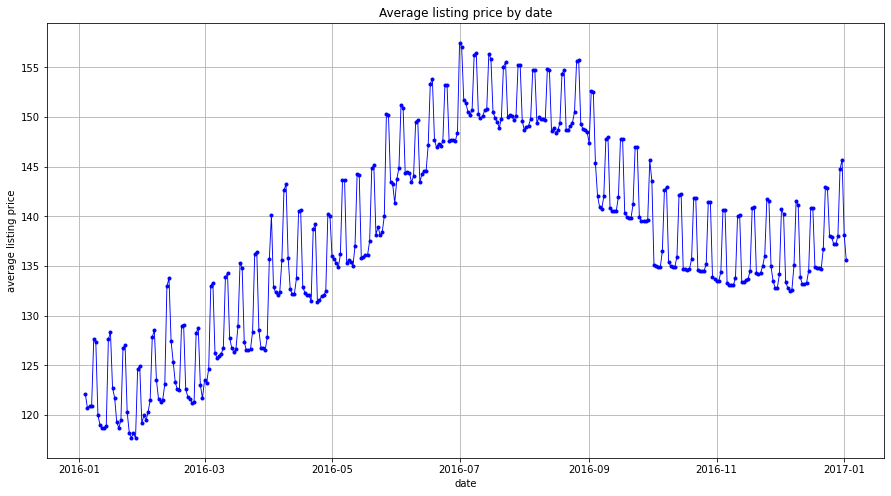

In [43]:
plt.figure(figsize=(15,8))
plt.plot(df_q3_calendar.date,df_q3_calendar.price,color='b',marker='.',linewidth=0.9)
plt.title('Average listing price by date')
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

The average price rise from 2016/1 to 2016/7, and reach peak for three months, and getting lower. And the average proce of 2017/1 is higher than 1 years ago.

 which does weekday have high price?

In [44]:
df_q3_calendar['weekday']=df_q3_calendar['date'].dt.day_name()

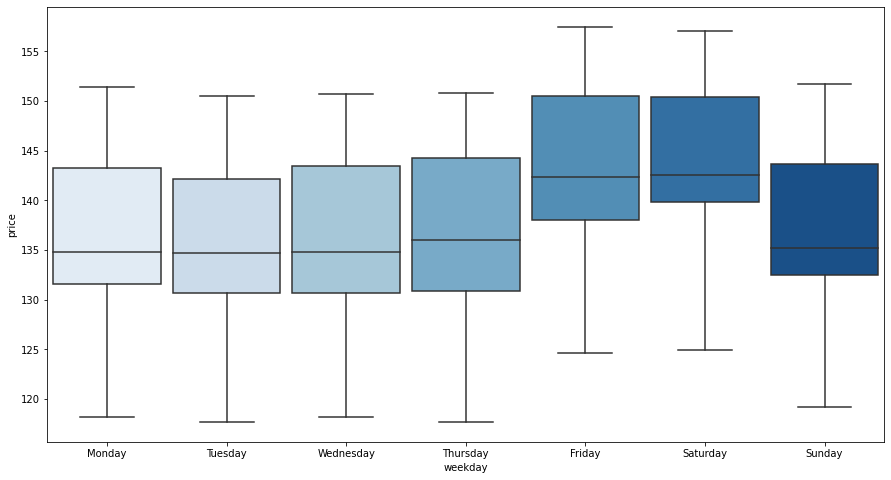

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='weekday',y='price',data=df_q3_calendar,palette='Blues',width=0.9)
plt.show()

so weekend friday and saturday are high price than other weekdays

Summary:
-> Each listings has 365 days record in this data.

-> If available values are f, the price values are NaN.

-> There is the weekly trend which the listing prices in weekend are higher than other weekday.

In [46]:
df_listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [47]:
print(list(df_listings.columns.values))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

How many listings are in the data

In [48]:
print('Num of listings:',df_listings.id.count())
print('Num of rows:',df_listings.shape[0])

Num of listings: 3818
Num of rows: 3818


distribution of each these three columns
 review_scores_rating,price,maximun_nights

In [49]:
df_listings['review_scores_rating'].describe().reset_index()


index  review_scores_rating
0  count           3171.000000
1   mean             94.539262
2    std              6.606083
3    min             20.000000
4    25%             93.000000
5    50%             96.000000
6    75%             99.000000
7    max            100.000000

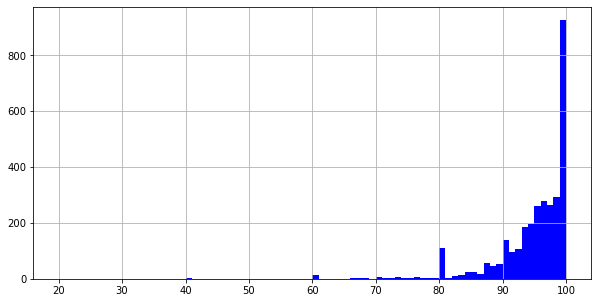

In [50]:
#clean the data
df_q1_listings=df_listings['review_scores_rating'].dropna()
#check the distribution is skewed
plt.figure(figsize=(10,5))
plt.hist(df_q1_listings.values,bins=80,color='b')
plt.grid()

This is very right skewed distribution.
The 75% or more values are 90 points. And the most common thing is 100 points.
the low score listings are minority.

In [51]:
df_listings['price'].describe().reset_index()

index    price
0   count     3818
1  unique      273
2     top  $150.00
3    freq      162

In [52]:
df_q2_listings=df_listings.copy(deep=True)
df_q2_listings=df_q2_listings['price'].dropna().reset_index()#dropping nulls
df_q2_listings['price']=df_q2_listings['price'].map(lambda x:float(x[1:].replace(',','')))#changing datatyype object to int
df_q2_listings['price'].describe().reset_index()

index        price
0  count  3818.000000
1   mean   127.976166
2    std    90.250022
3    min    20.000000
4    25%    75.000000
5    50%   100.000000
6    75%   150.000000
7    max  1000.000000

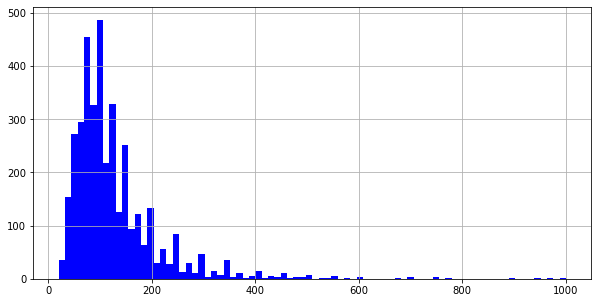

In [53]:
#distribution 
plt.figure(figsize=(10,5))
plt.hist(df_q2_listings.price.values,bins=80,color='b')
plt.grid()

This is long tail distribution.
Almost values are from 0 to 200.

In [54]:
df_listings['maximum_nights'].describe().reset_index()

index  maximum_nights
0  count     3818.000000
1   mean      780.447617
2    std     1683.589007
3    min        1.000000
4    25%       60.000000
5    50%     1125.000000
6    75%     1125.000000
7    max   100000.000000

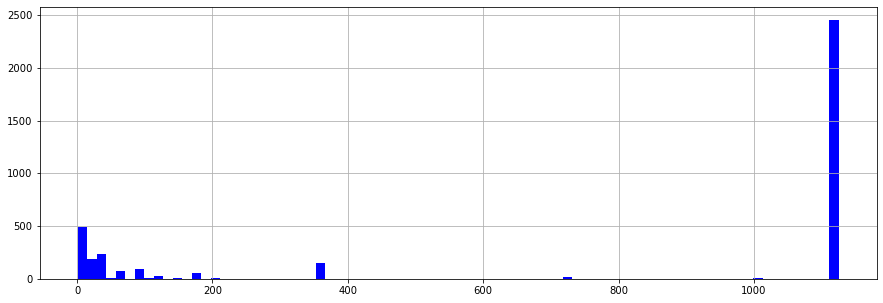

In [55]:
df_q3_listings=df_listings[df_listings['maximum_nights']<=1500]
plt.figure(figsize=(15,5))
plt.hist(df_q3_listings.maximum_nights,bins=80,color='b')
plt.grid()

 almost maxmum_night values are setted 1125.

In [56]:
#last dataset reviews
df_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [57]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [58]:
print("sample 1: ", df_reviews.comments.values[0], "\n")
print("sample 2: ", df_reviews.comments.values[3])

sample 1:  Cute and cozy place. Perfect location to everything!  

sample 2:  Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to. 


In [59]:
#there is no review score 
#convert date column to date from object
df_q1_reviews=df_reviews.copy(deep=True)
df_q1_reviews.date=pd.to_datetime(df_q1_reviews.date)
df_q1_reviews=df_q1_reviews.groupby('date')['id'].count().reset_index()


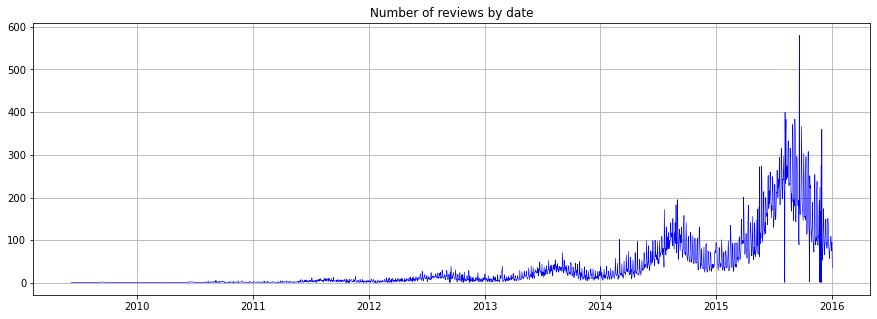

In [60]:
plt.figure(figsize=(15,5))
plt.plot(df_q1_reviews.date,df_q1_reviews.id,color='b',linewidth=0.6)
plt.title("Number of reviews by date")
#plt.xlabel('date')
#plt.ylabel('number of reviews')
plt.grid()

In [61]:
#create rolling mean column
df_q1_reviews['rolling_mean_30']=df_q1_reviews.id.rolling(window=30).mean()


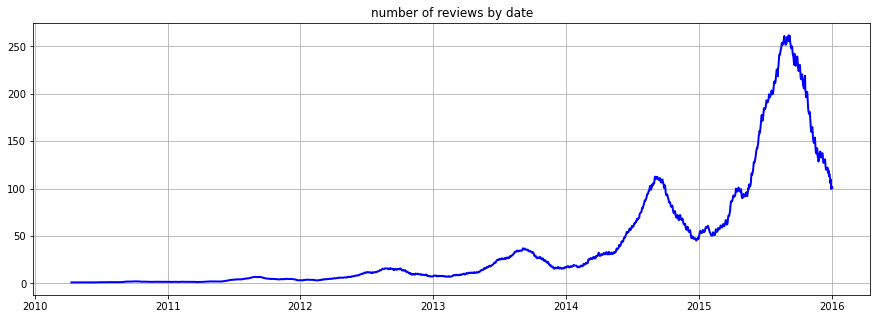

In [62]:
# plot avg listings prices over time.
plt.figure(figsize=(15,5))
plt.plot(df_q1_reviews.date,df_q1_reviews.rolling_mean_30,color='b',linewidth=2.0)
plt.title('number of reviews by date')
plt.grid()

In [63]:
#extract when the peak comes in each year.
df_q1_reviews['year']=df_q1_reviews.date.dt.year
years=df_q1_reviews.year.unique()
for year in years:
    if year >= 2010 and year < 2016:
        year_df = df_q1_reviews[df_q1_reviews.year == year]
        max_value = year_df.rolling_mean_30.max()
        max_date = year_df[year_df.rolling_mean_30 == max_value].date.dt.date.values[0]
        print(year, max_date, np.round(max_value, 1))

2010 2010-10-04 2.3
2011 2011-08-31 7.0
2012 2012-09-04 16.2
2013 2013-09-04 37.0
2014 2014-09-03 112.6
2015 2015-09-05 261.6


 How long is the period available for lending by rooms?
 
  plot a scatter plot of maximum nights and minimum nights.

<ipython-input-64-79f2a7b49e2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3_listings["min_max_night_diff"]=df_q3_listings.maximum_nights- df_q3_listings.minimum_nights


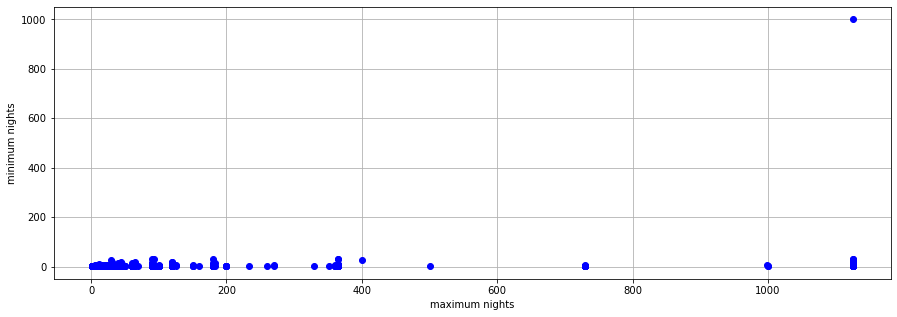

In [64]:
df_q3_listings["min_max_night_diff"]=df_q3_listings.maximum_nights- df_q3_listings.minimum_nights

plt.figure(figsize=(15,5))
plt.plot(df_q3_listings.maximum_nights,df_q3_listings.minimum_nights,linewidth=0,color='b',marker='o')
plt.xlabel('maximum nights')
plt.ylabel('minimum nights')
plt.grid()

the minimum nights is almost constant regardless of the maximum nights.

2nd question:
Is there a busy season?

biggest busy season was the beginning of September, but how long will it be the busy season? 

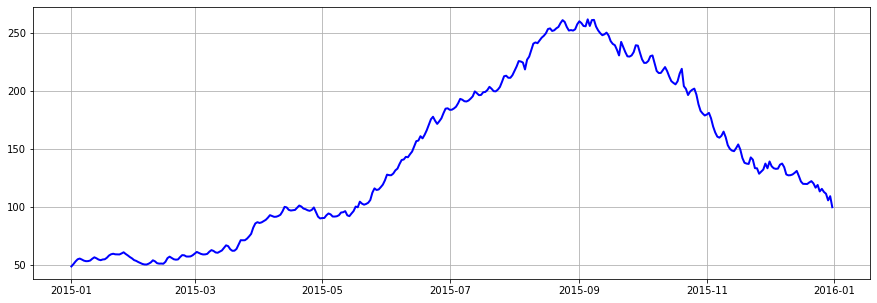

In [65]:
df_q2_reviews=df_q1_reviews[df_q1_reviews.year==2015]
df_q2_reviews.head()

plt.figure(figsize=(15,5))
plt.plot(df_q2_reviews.date,df_q2_reviews.rolling_mean_30,color='b',linewidth=2.0)
plt.grid()

It's hard to say clearly when to begin and when to end.
But, from here it may be able to say the busy season is One month before and after from September.

*Data Preparation*

3rd question:
"Are there any trends of popular rooms?".

Let's begin to clean and process the listing data.

In [66]:
df_prepare=df_listings.copy(deep=True)

In [67]:
#check null points
df_length=df_prepare.shape[0]
for col in df_prepare.columns:
    null_count=df_prepare[col].isnull().sum()
    if null_count==0:
        continue
    null_ratio=np.round(null_count/df_length*100, 2)  
    print(" {} has {} null values ({}%)".format(col,null_count,null_ratio))


 summary has 177 null values (4.64%)
 space has 569 null values (14.9%)
 neighborhood_overview has 1032 null values (27.03%)
 notes has 1606 null values (42.06%)
 transit has 934 null values (24.46%)
 thumbnail_url has 320 null values (8.38%)
 medium_url has 320 null values (8.38%)
 xl_picture_url has 320 null values (8.38%)
 host_name has 2 null values (0.05%)
 host_since has 2 null values (0.05%)
 host_location has 8 null values (0.21%)
 host_about has 859 null values (22.5%)
 host_response_time has 523 null values (13.7%)
 host_response_rate has 523 null values (13.7%)
 host_acceptance_rate has 773 null values (20.25%)
 host_is_superhost has 2 null values (0.05%)
 host_thumbnail_url has 2 null values (0.05%)
 host_picture_url has 2 null values (0.05%)
 host_neighbourhood has 300 null values (7.86%)
 host_listings_count has 2 null values (0.05%)
 host_total_listings_count has 2 null values (0.05%)
 host_has_profile_pic has 2 null values (0.05%)
 host_identity_verified has 2 null valu

most of the columns have between 0-30% of null_ratio so,
exclude the columns with 30% or more null ratio,also, it seems that there are only two null values in host_since used to calculate the target variable. This needs to be removed.

In [70]:
# detect need drop columns
drop_cols=[col for col in df_prepare.columns if df_prepare[col].isnull().sum()/df_length>=0.3]


#drop null
df_prepare.drop(drop_cols,inplace=True,axis=1)
df_prepare.count()

id                                  3818
listing_url                         3818
scrape_id                           3818
last_scraped                        3818
name                                3818
                                    ... 
cancellation_policy                 3818
require_guest_profile_picture       3818
require_guest_phone_verification    3818
calculated_host_listings_count      3818
reviews_per_month                   3191
Length: 86, dtype: int64

In [71]:
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview',
                'transit', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url',
                'host_picture_url', 'street', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review', 'amenities', 'host_verifications']
df_prepare.drop(drop_cols,axis=1,inplace=True)

In [77]:
df_prepare.columns

(3818, 52)

In [79]:
#delete single value columns
drop_col=[]
for col in df_prepare.columns:
    if df_prepare[col].nunique()==1:
        drop_col.append(col)
df_prepare.drop(drop_col,axis=1,inplace=True)     
df_prepare.shape

(3818, 48)

Finished removing columns that is not used for analysis

In [85]:
#available days count each listings
listings_available=df_calendar.groupby('listing_id')['price'].count().reset_index()
listings_available.columns=['id','available_count']

#merge
df_prepare=df_prepare.merge(listings_available,how='left',on='id')
df_prepare['host_since_year']=pd.to_datetime(df_prepare['host_since']).dt.year
df_prepare["easily_accomodated"] = df_prepare.accommodates / (df_prepare.available_count+1) / (2017 - df_prepare.host_since_year)